# Dog breed identification

This competition were launched by Kaggle (see the link: https://www.kaggle.com/c/dog-breed-identification). The raw dataset contains approx. 10K images of 120 dog breeds. For the sake of speed up, there are only 10 most popular breed were chosen.

This notebook represents a high-level comparison and visualization of learning different Convolutional Neural Network architectures. All code details were stored `.py` files in the same directory

In [ ]:
import matplotlib.pyplot as plt

from preproc import classes, encoder, loader
from trainer import Trainer
from utils import nets, plot_confusion_matrix

%matplotlib inline

Compare different types of CNN architectures and optimizers (MobileNetV2 and ResNet101 both with Adam and Nesterov SGD momentum optimizers)

In [ ]:
nets["mobile"].learn(n_epochs=10, loader)
nets["resnet"].learn(n_epochs=10, loader)
nets["mobile-sgd"].learn(n_epochs=10, loader)
nets["resnet-sgd"].learn(n_epochs=10, loader)

Let's see the confusion matrix for the best model on the validation set

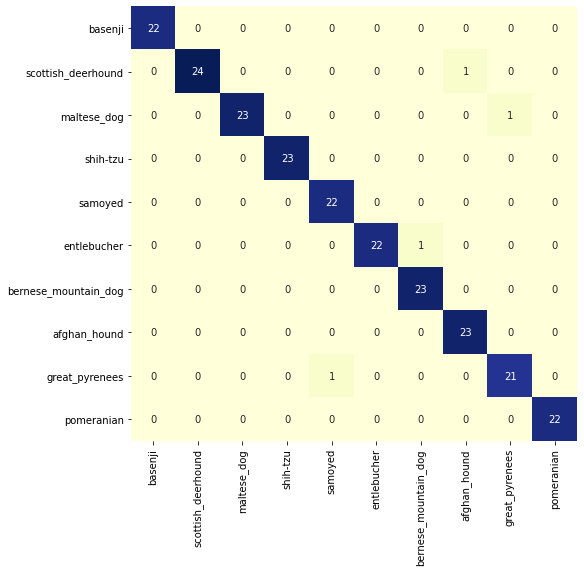

In [0]:
compute_confusion_matrix(
    true=nets["resnet"].true, pred=nets["resnet"].pred, encoder=encoder, classes=classes
)

Write all logs (loss on the training set and accuracy on the validation set) to pandas Dataframe for convinience 

In [0]:
stats = {}
for k, v in nets.items():
    stats[k] = pd.DataFrame(v.logs)

Plot loss and accuracy curves

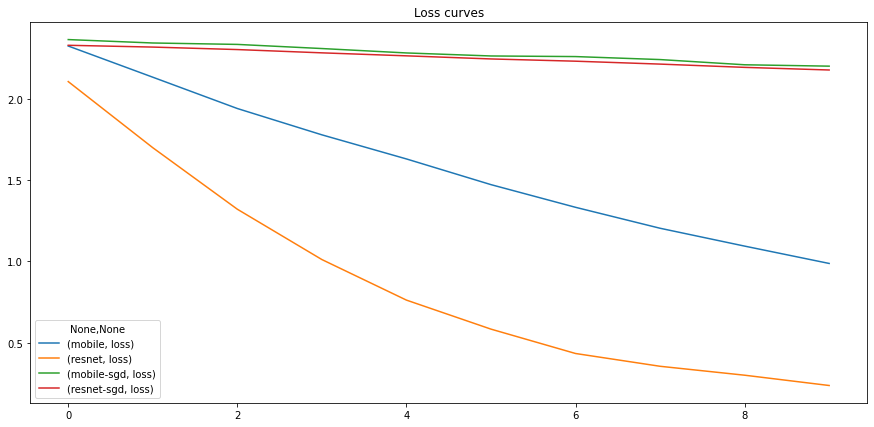

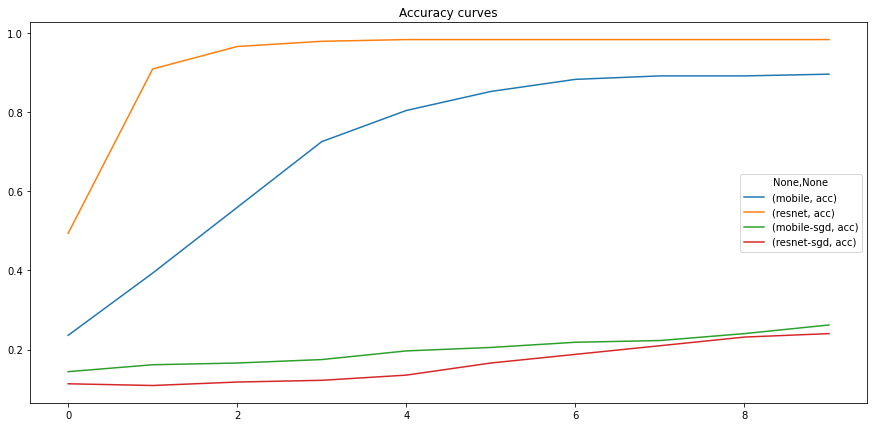

In [0]:
pd.concat(stats, axis=1).drop(["acc"], axis=1, level=1).plot(
    title="Loss curves", figsize=(15, 7)
)
pd.concat(stats, axis=1).drop(["loss"], axis=1, level=1).plot(
    title="Accuracy curves", figsize=(15, 7)
)